# Training from scratch

**Data.** Our task is to learn from noisy data points around a true curve:

In [1]:
from chapter import *

In [2]:
%config InlineBackend.figure_format = "svg"
import numpy as np
import matplotlib.pyplot as plt

N = 1500
X = np.linspace(-1, 5, N)
Y_true = X ** 2
Y = Y_true + 0.5 * np.random.normal(size=N, scale=3)

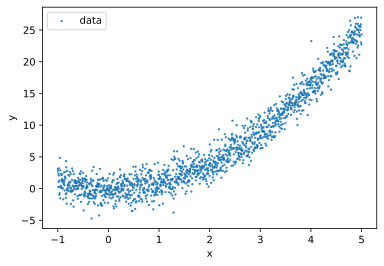

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="data", s=2, alpha=0.8)
plt.ylabel('y')
plt.xlabel('x')
plt.legend();

**Data loader.** Helper for loading the samples:

In [4]:
import random

class DataLoader:
    def __init__(self, dataset):
        """Iterate over a partition of the dataset."""
        self.dataset = [(Node(x), Node(y)) for x, y in dataset]
    
    def load(self):
        return random.sample(self.dataset, len(self.dataset))

    def __len__(self):
        return len(self.dataset)

**Model training.** The function `optim_step` implements one step of SGD with batch size 1. Here `loss_fn` just computes the MSE between two nodes.

In [5]:
def optim_step(model, lr=1.0):
    for p in model.parameters():
        p.data -= lr * p.grad 

def loss_fn(y_pred, y_true):
    return (y_pred - y_true) ** 2

Running the training algorithm:

In [6]:
from tqdm.notebook import tqdm

def train(model, dataset, epochs):
    dataloader = DataLoader(dataset)
    history = []
    for _ in tqdm(range(epochs)):
        for x, y in dataloader.load():
            loss = loss_fn(model([x]), y)
            loss.backward()
            optim_step(model, lr=0.0001)
            
            model.zero_grad()
            history.append(loss.data)
    
    return history

dataset = list(zip(X, Y))
model = MLP(1, [8, 4, 1], "tanh")
losses = train(model, dataset, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Loss curve becomes more stable as we train futher:

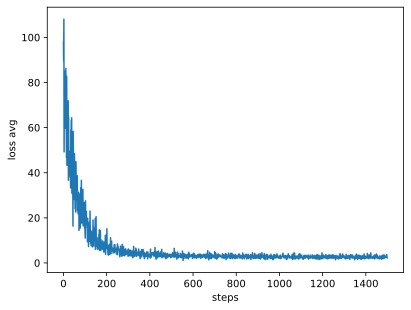

In [7]:
window = 50
loss_avg = np.array(losses).reshape(-1, window).mean(axis=1)

plt.plot(loss_avg)
plt.ylabel("loss avg")
plt.xlabel("steps");

Model learned: ヾ( ˃ᴗ˂ )◞ • *✰

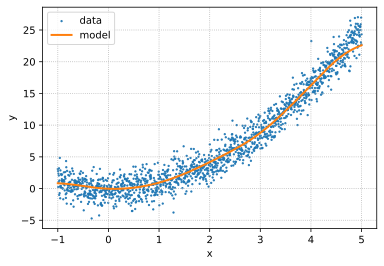

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, label="data", s=2, alpha=0.9)
plt.plot(X, [model([Node(x)]).data for x in X], label="model", color="C1", linewidth=2)

plt.ylabel("y")
plt.xlabel("x")
plt.grid(linestyle="dotted")
plt.legend();

Model graph visualization:

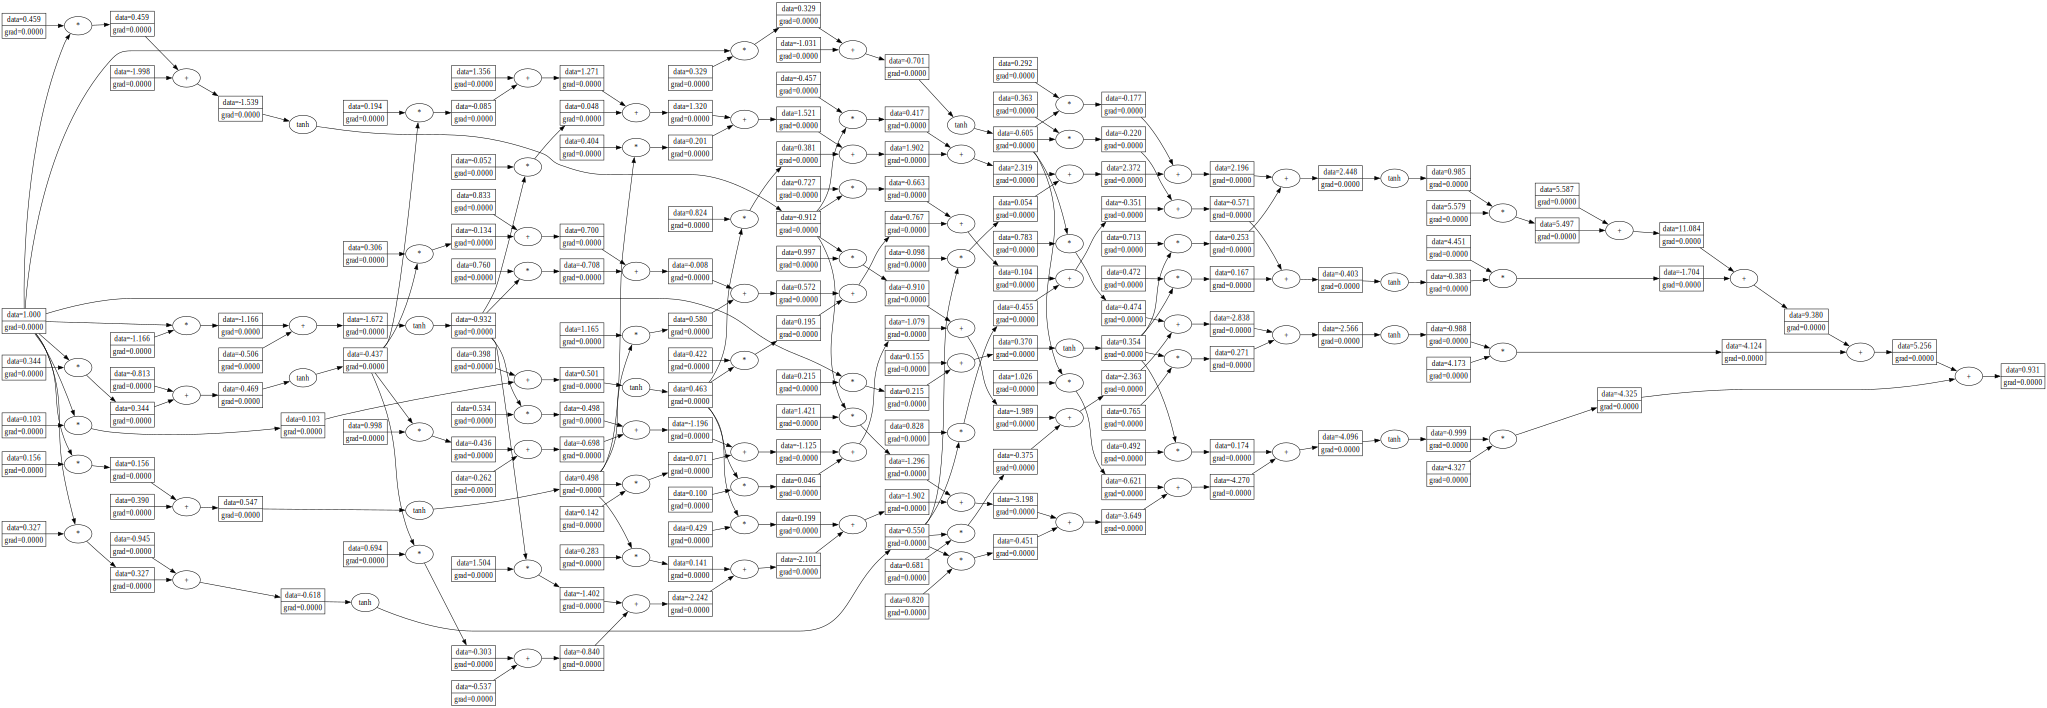

In [9]:
x = Node(1.0)
pred = model([x])
draw_graph(pred)